**Regresion logistica**

*Analisis del dataset*

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Cargar el dataset en CSV

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [3]:
# lectura de los Datos para el análisis exploratorio

Datos.head(50)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# la dimencio de los datos 
Datos.shape

(297, 14)

In [5]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


* en las edad podemos observar que el maximo es 77 años y el menor o minomos es 29 años*

*Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [13]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardica: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en presion arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Glucosa: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en sexo:  96
Cantidad de Registros con cero en Frecuencia cardica:  0
Cantidad de Registros con cero en presion arterial:  0
Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Glucosa:  254


realisece una estudio del dataset pero como el dataset en unas tablas como el sexo y la glucosa los datos ceros representa un valor en el sexo el 0 son fEMENINOS y en la Glucosa que no contiene Glucosa

Text(0.5, 1.0, 'Identificación de Datos de Colestrerol')

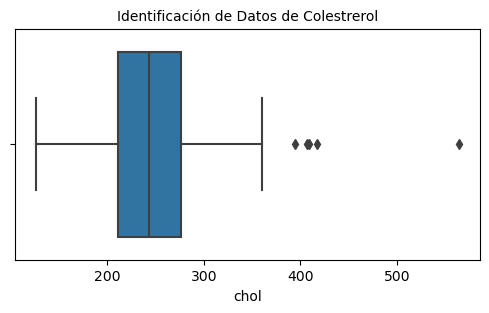

In [19]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos de Colestrerol', fontsize=10 )

In [20]:
#Conteo de Datos Atípicos

nivel_minimo=100
nivel_maximo=600
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))


El total de datos atípicos es 0


In [21]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Glucemia en ayunas > 120 mg/dL
1 = verdadero
0 = falso


In [26]:
# Total de personas con Glucometria en ayunas

Datos['fbs'].value_counts()




fbs
0    254
1     43
Name: count, dtype: int64

In [25]:
Datos[['fbs']].head(40)


,fbs
0,1
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,0


Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [27]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('fbs',axis=1) # Se cargan los datos de train sin los datos de la columna Glucometria en ayunas
Y = Datos['fbs'] # Se cargan los datos de train con los datos de la la columna Glucometria en ayunas

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [28]:
print (X_train)

     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
174   64    1   3       120   246        2       96      1      2.2      2   
86    64    1   2       125   309        0      131      1      1.8      1   
17    51    1   0       125   213        2      125      1      1.4      0   
112   54    0   2       108   267        2      167      0      0.0      0   
66    41    1   1       110   235        0      153      0      0.0      0   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
18    45    1   0       110   264        0      132      0      1.2      1   
95    60    0   2       120   178        0       96      0      0.0      0   
81    67    0   2       152   277        0      172      0      0.0      0   
273   46    1   3       140   311        0      120      1      1.8      1   
37    56    0   1       140   294        2      153      0      1.3      1   

     ca  thal  condition  
174   1     0          1  
86    0  

In [29]:
print (Y_train)

174    0
86     0
17     0
112    0
66     0
      ..
18     0
95     1
81     0
273    0
37     0
Name: fbs, Length: 222, dtype: int64


Entrenar el modelo configurando los diferentes hiperparámetros

In [30]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict 


In [31]:
print (Y_test)

48     1
284    0
211    0
36     0
108    0
      ..
291    0
57     0
90     0
128    0
229    0
Name: fbs, Length: 75, dtype: int64


In [32]:
print (Prediccion)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0]


Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [33]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.17      0.09      0.12        11

    accuracy                           0.80        75
   macro avg       0.51      0.51      0.50        75
weighted avg       0.75      0.80      0.77        75



en Precision vemos que el 0 hay 0.86 que no tuvieron glucosa en ayunas y un 0.17 si tuvieron glucosa en ayuna. vemos que en recall fi-score support el que predomina es el 0 que indica ue no tuvieron glucosa en ayunas

Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

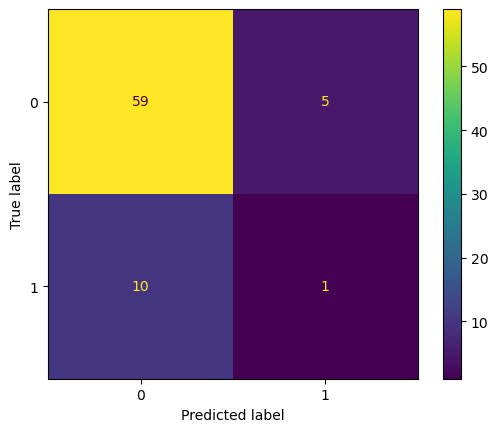

In [34]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

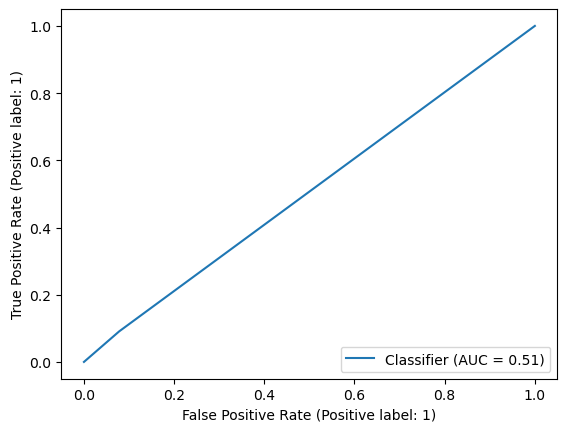

In [35]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

Interpretacion de los resultados

el desempeño del modelo se puede describir:

Precisión: observamos que  que obtubimos un 0.86 en la variable 0 que sinifica que es 86% de personas que no tubieron glucosa en ayuna y un 0.17 que era la variable 1 que si obtubieron glucosa en ayunas.

Recall: para la clase "Glucosa en ayunas" es 0,92, lo que indica que el modelo identificó correctamente al 92% de todos los que no tiene glucosa en ayunas.

F1 Score: para la clase de "glucosa en ayuna" obtubieron 0.89 lo que indica que es mas alto las persona que no tiene glucosa en ayunas.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: 5

Verdaderos positivos:  10

Falsos positivos: 59

Falsos negativos: 1

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,51 lo que significa que el 51% de las predicciones del clasificador son correctas.